<a href="https://colab.research.google.com/github/Rinniedh/Python_practice/blob/main/Validate_CSV_Predictions_585(Work%20in%20Progress).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#This Python notebook will attempt to validate your CSV predictions file. It does this by checking
#that the file contains one prediction for all 3000 consumers, and that each prediction is within the
#set of acceptable values. This notebook does NOT check whether your predictions are correct!!

#INSTRUCTIONS:
#1. Upload your CSV predictions file to your Colab notebook's session storage.
#2. Type the name of the predictions file that you would like to validate below.
#   For example: filename = 'Soper, Daniel.csv'
#3. Run the notebook!
Data= 'IncomeData.csv'

#import the CSV library
import csv

#define lists of acceptable salary category values and consumer IDs
salary_category_values = ['0', '1']
consumer_ids = [str(id) for id in range(20001, 23001)]

#load predictions from the CSV file
with open(Data) as csvfile:
  predictions = csv.DictReader(csvfile, fieldnames=['consumer_id', 'salary_category'])

  #holds consumer IDs that have been checked
  checked_ids = []

  #holds the results of the validation check
  results = ''

  #for each prediction in the CSV file
  for prediction in predictions:
    #if this is a valid consumer ID
    if prediction['consumer_id'] in consumer_ids:
      #if this consumer ID has not been seen already
      if prediction['consumer_id'] not in checked_ids:
        checked_ids.append(prediction['consumer_id'])
      else: #if this consumer ID has already been seen
        results += 'The CSV file contains multiple predictions for consumer ID: ' + prediction['consumer_id'] + '.\n'
    else: #if this is not a valid consumer ID
      results += 'The CSV file contains a prediction for an invalid consumer ID: ' + prediction['consumer_id'] + '.\n'
      print(prediction)
    #if the predicted salary category value is not in the set of acceptable values
    if prediction['salary_category'] not in salary_category_values:
      results += prediction['salary_category'] + ' is not a valid salary category prediction.\n'
  #if there is not a prediction for all 3000 consumers
  if len(checked_ids) < 3000:
    results += 'A prediction is missing for the following consumer ID(s):\n'
    for consumer_id in consumer_ids:
      if consumer_id not in checked_ids:
        results += consumer_id + '.\n'
  elif len(checked_ids) > 3000: #if there are too many predictions in the CSV file
    results += 'The CSV file contains more than 3000 predictions.'
  elif results == '': #if everything appears to be OK
    results = 'Your CSV file appears to be valid!'

  print(results)


Streaming output truncated to the last 5000 lines.
{'consumer_id': '15001', 'salary_category': '59', None: ['non_government', 'associates_degree_academic', 'widowed', '0', '3', '0', '0', '0', '40', '20', '0']}
{'consumer_id': '15002', 'salary_category': '50', None: ['non_government', 'some_college', 'married', '2', '1', '1', '0', '0', '40', '15', '1']}
{'consumer_id': '15003', 'salary_category': '42', None: ['government_federal', 'masters_degree', 'married', '1', '3', '1', '0', '5852', '40', '20', '1']}
{'consumer_id': '15004', 'salary_category': '66', None: ['non_government', 'bachelors_degree', 'married', '1', '3', '1', '0', '0', '40', '20', '1']}
{'consumer_id': '15005', 'salary_category': '24', None: ['non_government', 'high_school', 'never_married', '10', '3', '1', '0', '0', '40', '20', '0']}
{'consumer_id': '15006', 'salary_category': '53', None: ['government_local', 'high_school', 'married', '0', '3', '1', '0', '0', '60', '20', '0']}
{'consumer_id': '15007', 'salary_category': '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [55]:
 ## The Start of the Project
  ## 1. Define/Understand the Purpose: We are trying to build a model to accurately predict who has a high income.
  ## 2. We will set aside 3000 records as testing data for the model.

#import the pandas library
import pandas as pd

#load the CSV file into a pandas dataframe
df = pd.read_csv('IncomeData.csv', index_col='id')

#*** perform your data cleaning / preparation tasks here ***

#create a dataframe containing only those rows for which an
#income prediction needs to be made
df_predict = df[pd.isnull(df.high_income) == True].copy()

#remove all incomplete rows from the 'df' dataframe
df = df[pd.isnull(df.high_income) == False].copy()

# Now 'Data' contains the remaining records, and 'Test3000_df' contains the first 3000 records
print(f"Size of Ddf: {len(Data)}")
print(f"Size of df_predict: {len(df_predict)}")


Size of Ddf: 20000
Size of df_predict: 3000


In [56]:
## 3. Explore, clean, pre-process data
import pandas as pd

## I learn that for data type we do have 3 object columns. If I run into an issue where I need to convert to a float dummy code I will for certain algorithms.
data_type = type(df)
print(f"Data type of 'Data': {data_type}")

df.info()

## Checking for missing data ( We got none, rare)
missing_data = df.isnull().sum()
print(missing_data)

descriptive_stats = df.describe()
print(descriptive_stats)


Data type of 'Data': <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          20000 non-null  int64  
 1   employer_type                20000 non-null  object 
 2   highest_education_completed  20000 non-null  object 
 3   marital_status               20000 non-null  object 
 4   occupation_code              20000 non-null  int64  
 5   race_code                    20000 non-null  int64  
 6   gender                       20000 non-null  int64  
 7   capital_gains                20000 non-null  int64  
 8   capital_losses               20000 non-null  int64  
 9   hours_worked_per_week        20000 non-null  int64  
 10  native_country_code          20000 non-null  int64  
 11  high_income                  20000 non-null  float64
dtypes: float64(1), int64

In [70]:
##Data Transformation(Data Encoding): Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.

import pandas as pd

# Create dummy variables for employer_type
employer_type_dummies = pd.get_dummies(df["employer_type"], prefix="employer_type", drop_first=True)

# Drop the 'non_government' category and create dummy variables for the remaining categories
employer_type_dummies = pd.get_dummies(df["employer_type"].replace('non_government', None), prefix="employer_type", drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, employer_type_dummies], axis=1)

# Drop the original 'employer_type' column
df.drop("employer_type", axis=1, inplace=True)

# Create dummy variables for highest_education_completed
education_dummies = pd.get_dummies(df["highest_education_completed"], prefix="education", drop_first=True)

# Create dummy variables for marital_status
marital_status_dummies = pd.get_dummies(df["marital_status"], prefix="marital_status", drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, education_dummies, marital_status_dummies], axis=1)

# Drop the original 'highest_education_completed' and 'marital_status' columns
df.drop(["highest_education_completed", "marital_status"], axis=1, inplace=True)

# Convert DataFrame to integers
df = df.astype(int)

print(df)


       age  occupation_code  race_code  gender  capital_gains  capital_losses  \
id                                                                              
1       27                0          3       1              0               0   
2       44                2          3       0              0               0   
3       35               10          3       1              0               0   
4       19                4          3       1              0               0   
5       42                8          3       1              0               0   
...    ...              ...        ...     ...            ...             ...   
19996   24               10          3       1              0               0   
19997   24               10          3       1              0               0   
19998   30                2          3       0              0               0   
19999   41                7          3       1              0               0   
20000   19                4 

In [71]:
## Doing this will be helpful for Feature Selection Later. Correlation Matrix:

import pandas as pd

correlation_matrix = df.corr()

print(correlation_matrix)

                                   age  occupation_code  race_code    gender  \
age                           1.000000        -0.081652   0.021942  0.052817   
occupation_code              -0.081652         1.000000  -0.012706  0.179714   
race_code                     0.021942        -0.012706   1.000000  0.057011   
gender                        0.052817         0.179714   0.057011  1.000000   
capital_gains                 0.121322        -0.103475   0.016379  0.036040   
...                                ...              ...        ...       ...   
education_some_college       -0.094911         0.041318  -0.004529 -0.037740   
marital_status_married        0.281068         0.012273   0.042540  0.401098   
marital_status_never_married -0.510270         0.016527  -0.036420 -0.151484   
marital_status_separated      0.019468         0.013720  -0.046491 -0.094661   
marital_status_widowed        0.248401        -0.009534  -0.006577 -0.168456   

                              capital_g

Age (0.22):

Positive correlation: As age increases, the likelihood of having a high income also tends to increase.

Occupation Code (-0.25):

Negative correlation: Certain occupations are associated with a lower likelihood of having a high income.
Race Code (0.02):

Weak positive correlation: There is a minimal relationship between race and high income in the dataset.
Gender (0.12):

Positive correlation: One gender may have a slightly higher likelihood of having a high income than the other.
Capital Gains (0.33):

Moderate positive correlation: Individuals with higher capital gains tend to have a higher likelihood of having a high income.
Capital Losses (0.15):

Positive correlation: Individuals with higher capital losses may still have a higher likelihood of having a high income, but the correlation is weaker compared to capital gains.
Hours Worked per Week (0.18):

Positive correlation: Individuals who work longer hours per week tend to have a higher likelihood of having a high income.
Native Country Code (-0.04):

Weak negative correlation: Certain native countries may be associated with a slightly lower likelihood of having a high income.

Employer Type:
Government Local (-0.04):

Negative correlation: Individuals employed by local government entities are less likely to have a high income compared to those employed in the reference category (omitted category).
Government Federal (-0.03):

Negative correlation: Individuals employed by federal government entities are less likely to have a high income compared to those in the reference category.
Government State (-0.03):

Negative correlation: Individuals employed by state government entities are less likely to have a high income compared to those in the reference category.
Self-Employed Incorporated (0.01):

Weak positive correlation: Self-employed individuals with incorporated businesses have a slightly higher likelihood of having a high income compared to those in the reference category.
Self-Employed Not Incorporated (-0.00):

Very weak negative correlation: Self-employed individuals with non-incorporated businesses have a slightly lower likelihood of having a high income compared to those in the reference category.
Marital Status:
Married (0.38):

Strong positive correlation: Married individuals have a significantly higher likelihood of having a high income compared to those in the reference category (omitted category).
Never Married (-0.28):

Strong negative correlation: Individuals who have never been married are significantly less likely to have a high income compared to those in the reference category.
Separated (-0.06):

Weak negative correlation: Individuals who are separated have a slightly lower likelihood of having a high income compared to those in the reference category.
Widowed (-0.04):

Weak negative correlation: Widowed individuals have a slightly lower likelihood of having a high income compared to those in the reference category.
Educational Level:
Bachelors Degree (0.13):

Positive correlation: Individuals with a bachelor's degree have a moderately higher likelihood of having a high income compared to those in the reference category.
Doctoral Degree (0.09):

Positive correlation: Individuals with a doctoral degree have a higher likelihood of having a high income compared to those in the reference category.
High School (-0.01):

Weak negative correlation: Individuals with only a high school education have a slightly lower likelihood of having a high income compared to those in the reference category.
Masters Degree (0.10):

Positive correlation: Individuals with a master's degree have a moderately higher likelihood of having a high income compared to those in the reference category.
Professional Degree (0.11):

Positive correlation: Individuals with a professional degree have a moderately higher likelihood of having a high income compared to those in the reference category.
Some College (-0.04):

Weak negative correlation: Individuals with some college education have a slightly lower likelihood of having a high income compared to those in the reference category.


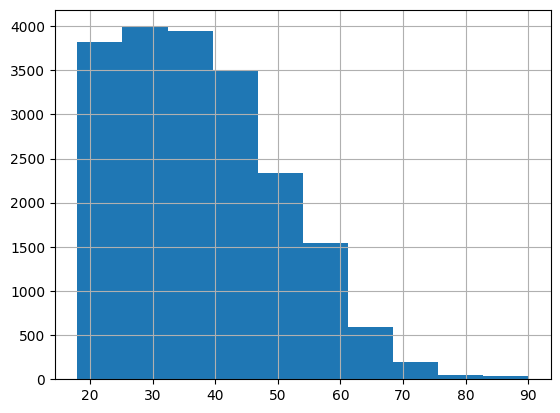

In [73]:
## Visualization to further understand the variables:

##Age: Looks like this is positively skewed with a right tail. Something to consider is ages from 37 onward might not properly be represented.

df["age"].hist()

import matplotlib.pyplot as plt


In [78]:
## Task for tomorrow: Normalize or standardize the data, scaling the data stratified splitting, handling imbalance classes.


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 1 to 20000
Columns: 136 entries, age to marital_status_widowed
dtypes: int64(136)
memory usage: 20.9 MB
age
occupation_code
race_code
gender
capital_gains
capital_losses
hours_worked_per_week
native_country_code
high_income
employer_type_government_local
employer_type_government_state
employer_type_non_government
employer_type_self_employed_incorporated
employer_type_self_employed_not_incorporated
education_associates_degree_vocational
education_bachelors_degree
education_doctoral_degree
education_high_school
education_masters_degree
education_professional_degree
education_some_college
marital_status_married
marital_status_never_married
marital_status_separated
marital_status_widowed
employer_type_government_local
employer_type_government_state
employer_type_non_government
employer_type_self_employed_incorporated
employer_type_self_employed_not_incorporated
education_associates_degree_vocational
education_bachelors_degree
educ